# Basic Clustering EDA





## Setup


In [34]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

## Loading Data

In [ ]:
df = pd.read()
df.info()

In [ ]:
df.describe()

## Dummy Dataset

## Features Explained

## Metrics

### Distance Metrics

The distance of two feature vectors: 

#### Euclidian Distance

### Loss Metrics

silhouette_score, davies_bouldin_score, v_measure_score

In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

## Scaling



## Dimensionality Reduction


### Principal Component Analysis

### t-SNE

## Clustering Methods

The following table shows a short summary of the methods https://scikit-learn.org/stable/modules/clustering.html


| Method name                  | Parameters                                                       | Scalability                                                 | Usecase                                                                   | Geometry (metric used)                       |
|------------------------------|------------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means                      | number of clusters                                               | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points                     |
| Affinity propagation         | damping, sample preference                                       | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Graph distance (e.g. nearest-neighbor graph) |
| Mean-shift                   | bandwidth                                                        | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Distances between points                     |
| Spectral clustering          | number of clusters                                               | Medium n_samples, small n_clusters                          | Few clusters, even cluster size, non-flat geometry                        | Graph distance (e.g. nearest-neighbor graph) |
| Ward hierarchical clustering | number of clusters or distance threshold                         | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints                          | Distances between points                     |
| Agglomerative clustering     | number of clusters or distance threshold, linkage type, distance | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| DBSCAN                       | neighborhood size                                                | Very large n_samples, medium n_clusters                     | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| OPTICS                       | minimum cluster membership                                       | Very large n_samples, large n_clusters                      | Non-flat geometry, uneven cluster sizes, variable cluster density         | Distances between points                     |
| Gaussian mixtures            | many                                                             | Not scalable                                                | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| Birch                        | branching factor, threshold, optional global clusterer.          | Large n_clusters and n_samples                              | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |


In [27]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs


In [28]:
n_features = 128
n_cluster = 2
cluster_std = 2
n_samples = 2000

In [29]:
X1, y1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

## K-means and the elbow plot

In [30]:
from sklearn.cluster import KMeans
X_scaled = X1
y = y1

In [31]:
km_scores = []
km_silhouette = []
vmeasure_score = []

for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -1017784.5638626124
Silhouette score for number of cluster(s) 2: 0.6534150736498778
V-measure score for number of cluster(s) 2: 1.0
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -1012956.2330914566
Silhouette score for number of cluster(s) 3: 0.33062582166258403
V-measure score for number of cluster(s) 3: 0.8014534512910086
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -1008252.9571333589
Silhouette score for number of cluster(s) 4: 0.008452208935217802
V-measure score for number of cluster(s) 4: 0.6671404514589658
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -1004645.2065961406
Silhouette score for number of cluster(s) 5: 0.008009047060280168
V-measure score for number of cluster(s) 5: 0.

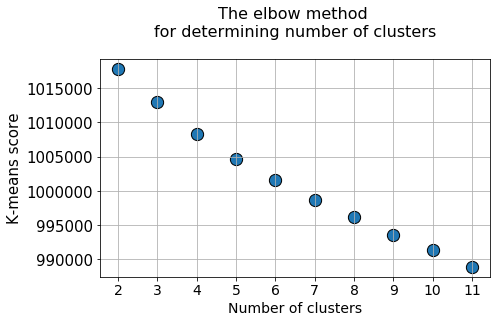

In [35]:
plt.figure(figsize=(7,4))
plt.title("The elbow method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)

plt.show()

## Hierachical Clustering

## Mean-shift Clustering

## DBSCAN

Consider [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) because it is multithreaded.